# Statistiques descriptives sur le profil 2023


## Prise en main de la base et nettoyage

In [180]:
# import des packages
from donnees_IDFM import donnees_profils_23
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
# importation de la base de données 2023
profils_23=donnees_profils_23()

In [72]:
profils_23

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,110,300,GALLIENI,71817,JOVS,23H-0H,0.82
1,100,110,300,GALLIENI,71817,SAHV,12H-13H,6.63
2,100,110,300,GALLIENI,71817,SAHV,16H-17H,7.49
3,100,110,300,GALLIENI,71817,SAHV,21H-22H,2.81
4,100,110,300,GALLIENI,71817,SAHV,3H-4H,0.00
...,...,...,...,...,...,...,...,...
84132,800,852,62,BELLEVUE,69528,SAVS,6H-7H,1.84
84133,800,852,657,PLAISIR GRIGNON,64199,DIJFP,17H-18H,8.30
84134,800,852,657,PLAISIR GRIGNON,64199,DIJFP,5H-6H,0.31
84135,800,852,657,PLAISIR GRIGNON,64199,DIJFP,8H-9H,4.92


Les **CAT_JOUR** sont les suivantes : 
    - **JOVS** : Jour ouvré en vacances scolaires
    - **JOHV** : Jour ouvré hors vacances 
    - **SAHV** : Samedi hors vacances
    - **SAVS** : Samedi en vacances scolaires
    - **DIJFP** : Dimanche et jours fériés

Pour une même station, on a donc normalement 24*5 = 120 lignes, mais on remarque que certaines lignes manquent (exemple sur la station Gallieni qui compte 119 lignes, avec la tranche horaire 3h-4h en SAVS manquante). 

In [4]:
_0 = profils_23[profils_23['pourc_validations'] == 0.00]
len(_0)

3001

Ces valeurs manquantes ne sont pas dûes à une absence de validation : on a bien des lignes qui apparaissent à des tranches horaires vides. Mais en moyenne, a-t-on bien un pourcentage de validations par jour de 100 (ie pas de NA?)

In [5]:
cat_jour = profils_23.groupby(['lda', 'CAT_JOUR'])['pourc_validations'].sum()
cat_jour


lda     CAT_JOUR
59403   DIJFP       100.00
        JOHV        100.00
        JOVS        100.02
        SAHV         99.99
        SAVS        100.02
                     ...  
999999  DIJFP       200.00
        JOHV        200.02
        JOVS        199.99
        SAHV        199.97
        SAVS        200.02
Name: pourc_validations, Length: 3630, dtype: float64

Les valeurs qui n'atteignent pas parfaitement 100 sont certainements duês à une approximation dans l'arrondi des pourcentages.  Cependant, on remarque une curieuse valeur pour le "lda" 999999 ...

In [182]:
lda_chelou = profils_23[profils_23['lda'] == 999999]
lda_chelou

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CAT_JOUR,TRNC_HORR_60,pourc_validations
2966,100,ND,ND,Inconnu,999999,DIJFP,1H-2H,0.06
2967,100,ND,ND,Inconnu,999999,DIJFP,20H-21H,5.90
2968,100,ND,ND,Inconnu,999999,JOHV,0H-1H,0.60
2969,100,ND,ND,Inconnu,999999,JOHV,12H-13H,4.18
2970,100,ND,ND,Inconnu,999999,JOHV,13H-14H,4.29
...,...,...,...,...,...,...,...,...
81372,100,ND,ND,Inconnu,999999,SAVS,18H-19H,10.59
81373,100,ND,ND,Inconnu,999999,SAVS,19H-20H,6.91
81374,100,ND,ND,Inconnu,999999,SAVS,21H-22H,3.39
81375,100,ND,ND,Inconnu,999999,SAVS,23H-0H,3.30


En l'absence d'informations supplémentaires sur ces lda, il ne semble par pertinent de traiter ces stations : on les exclut donc du dataframe.

In [221]:
profils_23_clean = profils_23[profils_23['lda'] != 999999]
profils_23_clean

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,110,300,GALLIENI,71817,JOVS,23H-0H,0.82
1,100,110,300,GALLIENI,71817,SAHV,12H-13H,6.63
2,100,110,300,GALLIENI,71817,SAHV,16H-17H,7.49
3,100,110,300,GALLIENI,71817,SAHV,21H-22H,2.81
4,100,110,300,GALLIENI,71817,SAHV,3H-4H,0.00
...,...,...,...,...,...,...,...,...
84132,800,852,62,BELLEVUE,69528,SAVS,6H-7H,1.84
84133,800,852,657,PLAISIR GRIGNON,64199,DIJFP,17H-18H,8.30
84134,800,852,657,PLAISIR GRIGNON,64199,DIJFP,5H-6H,0.31
84135,800,852,657,PLAISIR GRIGNON,64199,DIJFP,8H-9H,4.92


In [222]:
profils_23_clean1 = profils_23_clean.drop(columns = ['CODE_STIF_TRNS', 'CODE_STIF_ARRET']) 
profils_23_clean1
noms = ['rer', 'arret', 'lda', 'cat_jour', 'horaire', '%_val']

In [223]:
profils_23_clean1.columns = noms
profils_23_clean1

,rer,arret,lda,cat_jour,horaire,%_val
0,110,GALLIENI,71817,JOVS,23H-0H,0.82
1,110,GALLIENI,71817,SAHV,12H-13H,6.63
2,110,GALLIENI,71817,SAHV,16H-17H,7.49
3,110,GALLIENI,71817,SAHV,21H-22H,2.81
4,110,GALLIENI,71817,SAHV,3H-4H,0.00
...,...,...,...,...,...,...
84132,852,BELLEVUE,69528,SAVS,6H-7H,1.84
84133,852,PLAISIR GRIGNON,64199,DIJFP,17H-18H,8.30
84134,852,PLAISIR GRIGNON,64199,DIJFP,5H-6H,0.31
84135,852,PLAISIR GRIGNON,64199,DIJFP,8H-9H,4.92


On enlève les colonnes qui ne sont pas intéressantes pour l'analyse: SITF_TRNS et SITF_ARRET, et on renomme les autres de manière plus simple et intuitive

On travaille ici sur les RER, dont les codes SITF_RES sont respectivement 801, 802, 803, 804, et 805 : on ne garde donc que ces valeurs.

In [236]:
profils_23_0 = profils_23_clean1[profils_23_clean1['rer'].isin(rer_stif)]
profils_23_0.loc[profils_23_0['rer'] == '801', 'rer'] = 'RER A'
profils_23_0.loc[profils_23_0['rer'] == '802', 'rer'] = 'RER B'
profils_23_0.loc[profils_23_0['rer'] == '803', 'rer'] = 'RER C'
profils_23_0.loc[profils_23_0['rer'] == '804', 'rer'] = 'RER D'
profils_23_0.loc[profils_23_0['rer'] == '805', 'rer'] = 'RER E'

profils_23_0

,rer,arret,lda,cat_jour,horaire,%_val
3352,RER C,BOURAY,59830,DIJFP,10H-11H,5.05
3353,RER C,BOURAY,59830,DIJFP,18H-19H,12.97
3354,RER C,BOURAY,59830,DIJFP,1H-2H,0.01
3355,RER C,BOURAY,59830,DIJFP,4H-5H,0.81
3356,RER C,BOURAY,59830,DIJFP,7H-8H,2.43
...,...,...,...,...,...,...
82788,RER E,YVRIS NOISY GD,73096,JOVS,23H-0H,0.02
82789,RER E,YVRIS NOISY GD,73096,SAHV,14H-15H,7.59
82790,RER E,YVRIS NOISY GD,73096,SAHV,15H-16H,6.32
82791,RER E,YVRIS NOISY GD,73096,SAHV,16H-17H,7.40


In [187]:
print(f"Nombre de valeurs différentes d'arrêts : {profils_23_0['arret'].nunique()} ; Nombre de valeurs différentes de lda : {profils_23_0['lda'].nunique()}")

Nombre de valeurs différentes d'arrêts : 233 ; Nombre de valeurs différentes de lda : 230


On a donc 3 arrêts pour lesquels le nom inscrit est différent du lda. Trouvons-les

In [237]:
diff = profils_23_0.groupby('lda')['arret'].nunique() 
arret_dif = diff[diff != 1]
arret_dif

lda
63244    2
63320    2
73620    2
Name: arret, dtype: int64

Les 3 lda dédoublés sont donc les 63244, 63320, et 73620, qui correspondant aux arrêts de Massy-Palaiseau, Massy-Verrières et Saint-Michel-Notre-Dame. En affichant ces arrêts, on se rend compte que ces stations sont simplement des correspondances (**ex** Massy-Palaiseau (RER B) vs Massy-Palais. (RER C)

Enfin, on remarque la présence de 9 'ND' dans les horaires, associés à des pourcentages de 0 ; on les enlève également.

In [238]:
profils_23_01 = profils_23_0[profils_23_0['horaire'] != 'ND']

Notre dataframe est propre, nous pouvons passer aux statistiques descriptives.

In [239]:
profil = profils_23_01.copy()

In [240]:
profil

,rer,arret,lda,cat_jour,horaire,%_val
3352,RER C,BOURAY,59830,DIJFP,10H-11H,5.05
3353,RER C,BOURAY,59830,DIJFP,18H-19H,12.97
3354,RER C,BOURAY,59830,DIJFP,1H-2H,0.01
3355,RER C,BOURAY,59830,DIJFP,4H-5H,0.81
3356,RER C,BOURAY,59830,DIJFP,7H-8H,2.43
...,...,...,...,...,...,...
82788,RER E,YVRIS NOISY GD,73096,JOVS,23H-0H,0.02
82789,RER E,YVRIS NOISY GD,73096,SAHV,14H-15H,7.59
82790,RER E,YVRIS NOISY GD,73096,SAHV,15H-16H,6.32
82791,RER E,YVRIS NOISY GD,73096,SAHV,16H-17H,7.40


## Interprétation graphique

On veut extraire puis trier la liste des heures de la journée pour pouvoir les afficher chronologiquement sur notre graphique.

In [242]:
liste_heures = profil['horaire'].unique().tolist()
liste_heures

['10H-11H',
 '18H-19H',
 '1H-2H',
 '4H-5H',
 '7H-8H',
 '16H-17H',
 '20H-21H',
 '23H-0H',
 '13H-14H',
 '17H-18H',
 '22H-23H',
 '19H-20H',
 '12H-13H',
 '15H-16H',
 '8H-9H',
 '21H-22H',
 '14H-15H',
 '0H-1H',
 '6H-7H',
 '5H-6H',
 '11H-12H',
 '9H-10H',
 '2H-3H',
 '3H-4H']

In [245]:
# On définit la fonction de tri de la liste

def ordre(heure):
    return int(heure.split('H')[0])

heures_triees = sorted(liste_heures, key=ordre)


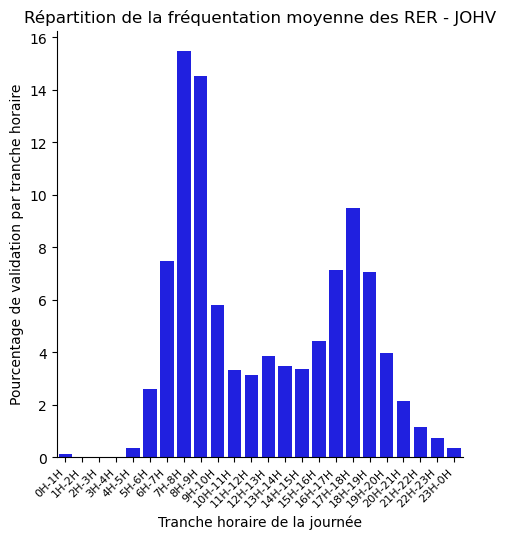

<Figure size 3000x1000 with 0 Axes>

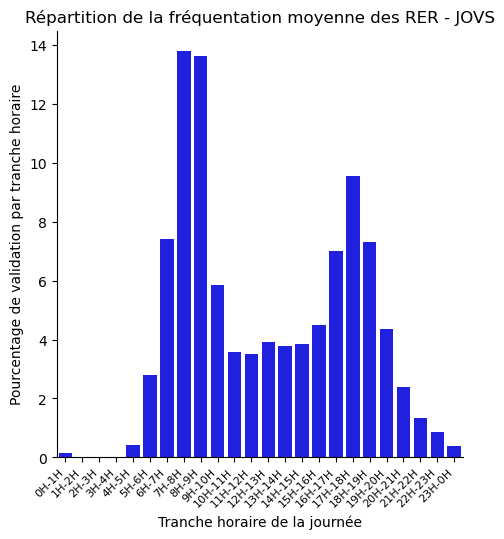

<Figure size 3000x1000 with 0 Axes>

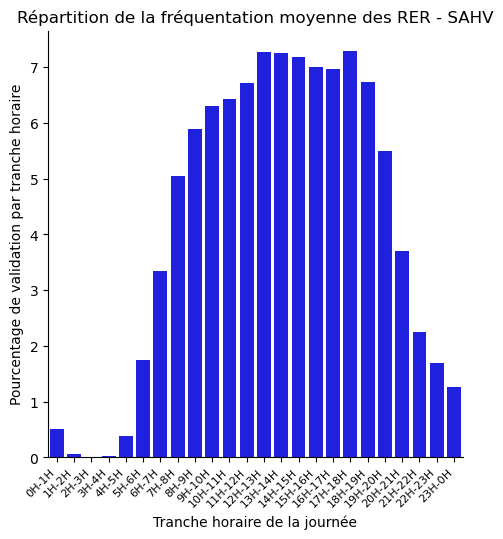

<Figure size 3000x1000 with 0 Axes>

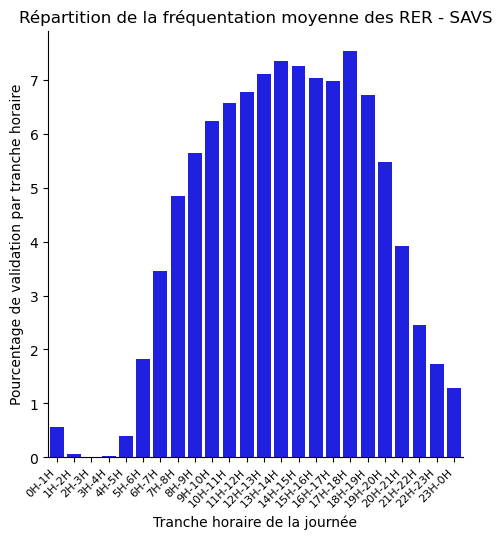

<Figure size 3000x1000 with 0 Axes>

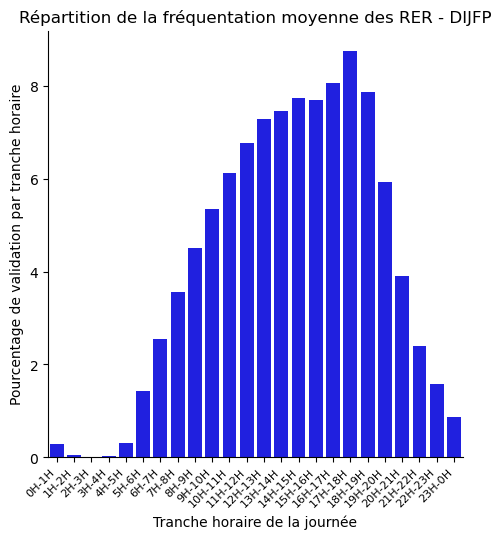

<Figure size 3000x1000 with 0 Axes>

In [288]:
jour = ['JOHV', 'JOVS', 'SAHV', 'SAVS', 'DIJFP']

# On crée une boucle qui trace 5 graphique de fréquentation horaire moyenne des RER (un graphe par catégorie de jour)
for data,cat in enumerate(jour) :
    data = profil[profil['cat_jour'] == cat]
    val_moy_jour = data.groupby(['cat_jour', 'horaire']).agg({'%_val' : 'mean'})
    repartition = sns.catplot(x='horaire', y='%_val', data=val_moy_jour, kind = "bar", height = 5, aspect = 1, color = "blue", order = heures_triees)
    ax = repartition.ax
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.figure(figsize=(30, 10))
    ax.set_xlabel('Tranche horaire de la journée')
    ax.set_ylabel('Pourcentage de validation par tranche horaire')
    ax.set_title(f"Répartition de la fréquentation moyenne des RER - {cat}")
    
plt.show()

On remarque 3 types de répartition différente : une pour les jours ouvrés, une pour les samedis, et une pour les dimanches et jours fériés ; le fait d'être en vacances ou non ne semble pas avoir d'influence sur la répartition. Est-elle la même pour tous les RER ?

In [287]:
noms_rer = ['RER A', 'RER B', 'RER C', 'RER D', 'RER E']
cat_rer ={}

# On définit les sous groupes du dataframe qui regroupent chaque ligne de RER
for rer in noms_rer:
    profil_rer = profil[profil["rer"] == rer ]
    cat_rer[rer] = profil_rer
   

In [294]:
jour = ['JOHV', 'JOVS', 'SAHV', 'SAVS', 'DIJFP']

def grapherer(k):
    for data,cat in enumerate(jour) :
        data = profil[profil['cat_jour'] == cat]
        val_moy_jour = data.groupby(['cat_jour', 'horaire']).agg({'%_val' : 'mean'})
        repartition = sns.catplot(x='horaire', y='%_val', data=val_moy_jour, kind = "bar", height = 5, aspect = 1, color = "blue", order = heures_triees)
        ax = repartition.ax
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.figure(figsize=(30, 10))
        ax.set_xlabel('Tranche horaire de la journée')
        ax.set_ylabel('Pourcentage de validation par tranche horaire')
        ax.set_title(f"Répartition de la fréquentation moyenne du RER - {cat} ")
    plt.show()

Notre fonction "grapherer" appelle désormais les 5 graphiques correspondants à la ligne de RER demandée

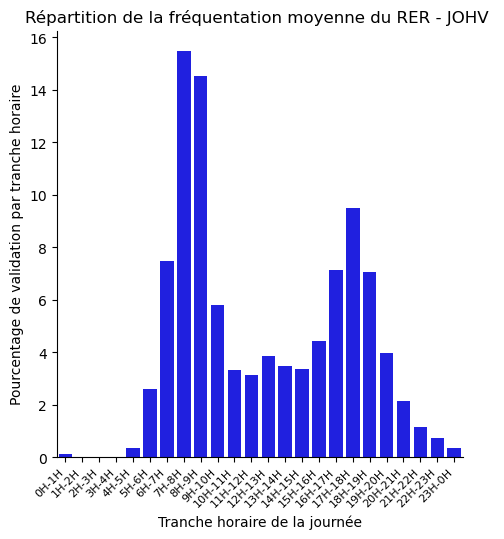

<Figure size 3000x1000 with 0 Axes>

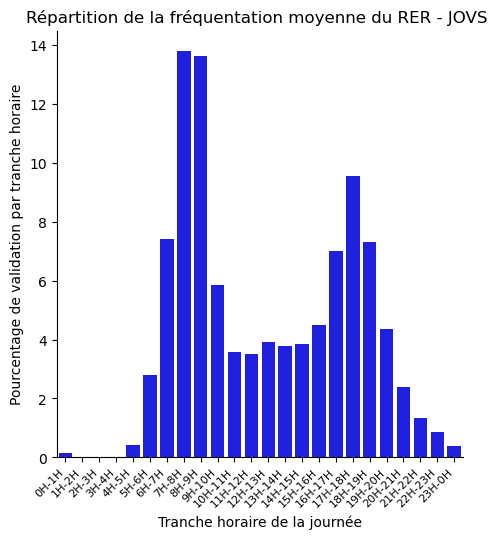

<Figure size 3000x1000 with 0 Axes>

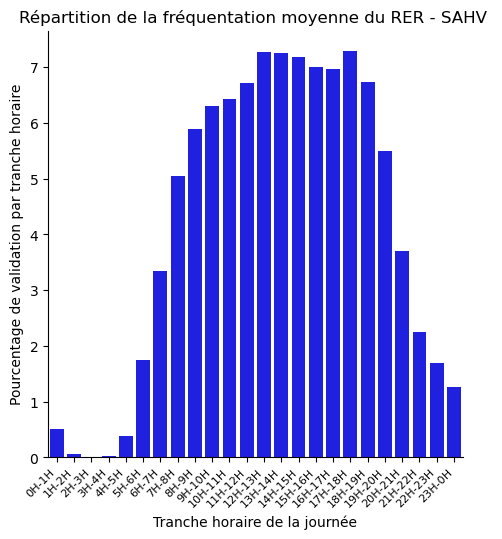

<Figure size 3000x1000 with 0 Axes>

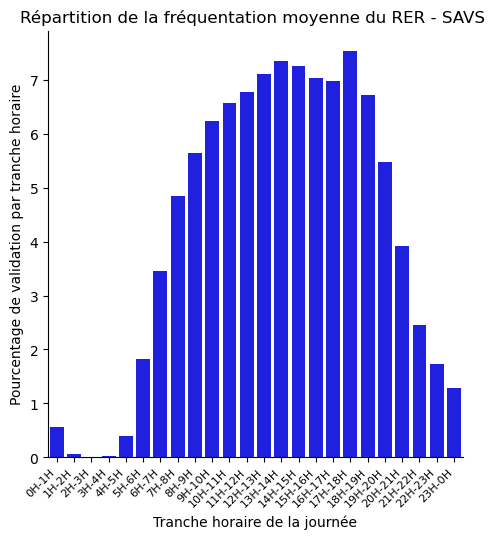

<Figure size 3000x1000 with 0 Axes>

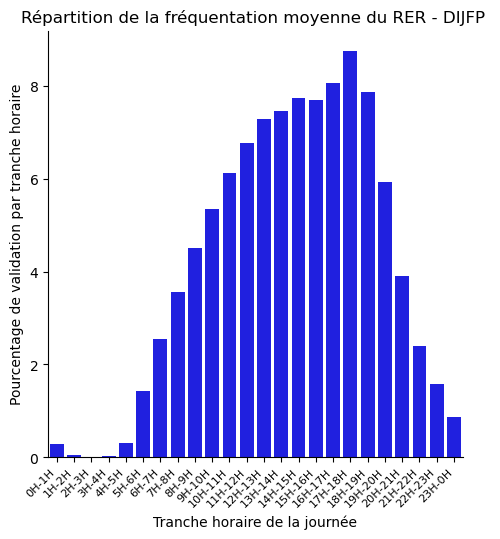

<Figure size 3000x1000 with 0 Axes>

In [295]:
grapherer(cat_rer['RER A'])